## Pruebas para la determinación de normalidad en los datos medidos intralaboratorio 

Se importan las librerias necesarias para las pruebas

In [ ]:
import numpy as np
import pandas as pd


Se cargan los datos a los cuales se pretende realizar las pruebas de normalidad

In [ ]:
comparacion_intra_lab = '/content/drive/MyDrive/Metrología/Estadistica/Estadistica/DS05-F04 008  2022 Par torsional.xlsm' 
int_lab = pd.read_excel(comparacion_intra_lab, sheet_name = 'DC05-F04 Intralaboratorio')


Se genera la tabla que almacena los puntos de medicón con sus respectivos operarios

In [ ]:
puntos_de_medición = pd.DataFrame(int_lab.iloc[25:32,0:4])
puntos_de_medición.columns = ['Nombre','1 punto de medición','2 punto de medición','3 punto de medición'] 

In [ ]:
puntos_de_medición = puntos_de_medición.reset_index()
puntos_de_medición = puntos_de_medición.drop([0],axis = 0)
puntos_de_medición = puntos_de_medición.drop(['index'],axis = 1)
puntos_de_medición

,Nombre,1 punto de medición,2 punto de medición,3 punto de medición
1,Favian Martinez,3.7536,6.0975,5.424
2,NaN,3.4,6.0162,5.5596
3,NaN,3.128,5.8536,6.102
4,Diego Rodriguez,3.5904,5.8536,5.8308
5,NaN,3.9712,6.0975,7.8648
6,NaN,4.08,5.8536,7.8648


Se realiza un dataframe de las mediciones por los dos operarios 

In [ ]:
pts_med = puntos_de_medición.iloc[0:,:]
pts_med = pts_med.fillna(pts_med.iloc[0,0])
pts_med = pts_med.reset_index()
pts_med = pts_med.drop(['index'],axis = 1)
pts_med

,Nombre,1 punto de medición,2 punto de medición,3 punto de medición
0,Favian Martinez,3.7536,6.0975,5.4240
1,Favian Martinez,3.4000,6.0162,5.5596
2,Favian Martinez,3.1280,5.8536,6.1020
3,Diego Rodriguez,3.5904,5.8536,5.8308
4,Favian Martinez,3.9712,6.0975,7.8648
5,Favian Martinez,4.0800,5.8536,7.8648


De los puntos de medida, se definen los dos operarios implicado en la prueba


In [ ]:
operario_1 = pts_med.iloc[0:3,:]
operario_2 = pts_med.iloc[3:,:]


In [ ]:
print(pts_med)

            Nombre  1 punto de medición  2 punto de medición  \
0  Favian Martinez               3.7536               6.0975   
1  Favian Martinez               3.4000               6.0162   
2  Favian Martinez               3.1280               5.8536   
3  Diego Rodriguez               3.5904               5.8536   
4  Favian Martinez               3.9712               6.0975   
5  Favian Martinez               4.0800               5.8536   

   3 punto de medición  
0               5.4240  
1               5.5596  
2               6.1020  
3               5.8308  
4               7.8648  
5               7.8648  


### Pruebas de normalidad

Prueba de normalidad Shapiro Wilk




El test de Shapiro-Wilks plantea la hipótesis nula que una muestra proviene de una distribución normal. Eligimos un nivel de significanza, por ejemplo 0,05, y tenemos una hipótesis alternativa que sostiene que la distribución no es normal.

In [ ]:
from scipy import stats

shapiro_test = []
shapiro_test =([stats.shapiro(pts_med[i]) for i   in  pts_med.columns[1:] ])
shapiro_test  = pd.DataFrame(shapiro_test, index = pts_med.columns[1:])
shapiro_test 

,statistic,pvalue
1 punto de medición,0.971583,0.902892
2 punto de medición,0.766596,0.028815
3 punto de medición,0.790101,0.047788


Prueba Kolmogorov-Smirnov para un solo vector, comparando con un distribución normal 

In [ ]:
testks = []
testks =([stats.kstest(pts_med[i],'norm') for i   in  pts_med.columns[1:] ])
testks  = pd.DataFrame(testks, index = pts_med.columns[1:])
testks 

,statistic,pvalue
1 punto de medición,0.99912,9.288139e-19
2 punto de medición,1.00000,3.872247e-52
3 punto de medición,1.00000,1.224509e-45


Prueba Kolmogorov-Smirnov para dos vectores, comparando la similitud de los dos vectores 

In [ ]:
testks2 = []
testks2 = [ stats.ks_2samp(operario_1[i], operario_2[i]) for i in   operario_2.columns[1:]      ]
testks2 =  pd.DataFrame(testks2, index = operario_2.columns[1:])
testks2

,statistic,pvalue
1 punto de medición,0.666667,0.6
2 punto de medición,0.333333,1.0
3 punto de medición,0.666667,0.6


### Regresión lineal 

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
pts_med['3 punto de medición']

0    5.4240
1    5.5596
2    6.1020
3    5.8308
4    7.8648
5    7.8648
Name: 3 punto de medición, dtype: float64

(0.0, 10.0)

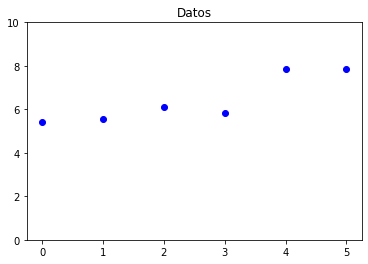

In [ ]:
x = np.array(range(len(pts_med)))
y = pts_med['3 punto de medición']
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos');
plt.ylim(0,10)
#plt.xlim()

In [ ]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(x.reshape(-1, 1), y) 

LinearRegression()

In [ ]:
y_prediccion = regresion_lineal.predict(x.reshape(-1,1))

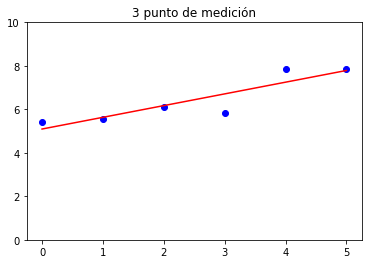

In [ ]:
plt.scatter(x,y,label='data', color='blue')
plt.plot(x,y_prediccion,label='data', color='red',)
plt.title('3 punto de medición');
plt.ylim(0,10)
plt.show()
#plt.xlim()

In [ ]:
residuos = y - y_prediccion

In [ ]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuos)

2.6176574248120295

Prueba de homoscedasticidad

In [ ]:
levene_test = []
levene_test = [ stats.levene(operario_1[i], operario_2[i], center='median') for i in   operario_2.columns[1:]      ]
levene_test =  pd.DataFrame(levene_test, index = operario_2.columns[1:])
levene_test

,statistic,pvalue
1 punto de medición,0.084746,0.785437
2 punto de medición,0.000000,1.000000
3 punto de medición,0.420168,0.552184


El test de Levene es un test de hipótesis empleado para comparar la varianza entre grupos. En todos ellos, se considera como hipótesis nula que los datos proceden de distribuciones con la misma varianza (homocedasticidad). ***Por lo tanto, si el p-value es menor que un determinado valor (típicamente 0.05), entonces se considera que hay evidencias suficientes para rechazar la homocedasticidad en favor de la heterocedasticidad.***

Si se tiene seguridad de que las muestras a comparar proceden de poblaciones que siguen una distribución normal, es recomendable el test de Bartlett. Si no se tiene la seguridad de que las poblaciones de origen son normales, se recomiendan el test de Leven utilizando la mediana o el test no paramétrico Fligner-Killeen que también se basa en la mediana.

pruba no paramétrica de la habitual prueba t de Student. Mann-Whitnei

Ahora dependiendo de la prueba de normalidad aplicamos analisis de varianza no parametrico

In [ ]:
def p_vprueba(x,y,x1,x2):
  mannwhitneyu_test = []
  names = []
  for i in range(len(x)): 
    if (x.iloc[i,1] < 0.05 or y.iloc[i,1] < 0.05):
        aux = mannwhitneyu(x1[y.index[i]], x2[y.index[i]], method="exact") 
        mannwhitneyu_test.append(aux)
        aux = y.index[i]
        names.append(aux)

  mannwhitneyu_test = pd.DataFrame(mannwhitneyu_test, index = names)

  return mannwhitneyu_test
  
    

Prueba de residuos, si cumple las tres, se aplica analisis de varianza, se aplica lo que esta planteado ya